<a href="https://colab.research.google.com/github/rebertmatheus/colab-notebooks/blob/master/Lab_C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cálculo de Métricas de Avaliação de Aprendizado

## Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix
)

## Definindo as classes e seus valores

In [2]:
# Dados fictícios para exemplo de classificação multiclasse
y_true_clf = [0, 1, 2, 1, 0, 2, 1, 0, 2, 1]  # Classes verdadeiras
y_pred_clf = [0, 2, 2, 1, 0, 0, 1, 0, 2, 2]  # Classes previstas
y_scores_clf = [
    [0.8, 0.1, 0.1],  # Pontuações preditivas para a amostra 1
    [0.2, 0.5, 0.3],  # Pontuações preditivas para a amostra 2
    [0.1, 0.3, 0.6],  # Pontuações preditivas para a amostra 3
    [0.2, 0.7, 0.1],  # Pontuações preditivas para a amostra 4
    [0.9, 0.05, 0.05], # Pontuações preditivas para a amostra 5
    [0.4, 0.2, 0.4],  # Pontuações preditivas para a amostra 6
    [0.3, 0.6, 0.1],  # Pontuações preditivas para a amostra 7
    [0.7, 0.2, 0.1],  # Pontuações preditivas para a amostra 8
    [0.1, 0.3, 0.6],  # Pontuações preditivas para a amostra 9
    [0.2, 0.4, 0.4],  # Pontuações preditivas para a amostra 10
]
classes = [0, 1, 2]

## Criando as Funções de avaliação

Plotando a Matrix de confusão

In [3]:
# Função para plotar a matriz de confusão
def plot_conf_matrix(conf_mat):
    cm_normalizado = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    cm_df = pd.DataFrame(cm_normalizado, index=classes, columns=classes)
    print("\n")
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Matriz de Confusão Normalizada')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

Calculando a Sensibilidade

In [4]:
def calc_sensibility(conf_matrix):


  tp = np.trace(conf_matrix)  # Soma dos verdadeiros positivos (diagonal da matriz)
  fn = np.sum(conf_matrix) - tp  # Soma de todos os falsos negativos

  recall = tp / (tp + fn) if (tp + fn) > 0 else 0

  print(f"Sensibilidade: {recall:.2f}")

Calculando a especificidade

In [5]:
def calc_specificity(conf_matrix):
  # Calcular TN e FP
  total = np.sum(conf_matrix)
  tp = np.trace(conf_matrix)  # Soma dos verdadeiros positivos
  fp = np.sum(conf_matrix, axis=0) - np.diag(conf_matrix)  # Soma dos falsos positivos por classe
  tn = total - (np.sum(conf_matrix, axis=1) + fp)  # Total - (TP + FP + FN)

  # Calcular especificidade micro average
  tn_micro = np.sum(tn)
  fp_micro = np.sum(fp)
  micro_avg_specificity = tn_micro / (tn_micro + fp_micro) if (tn_micro + fp_micro) > 0 else 0

  print(f"Especificidade: {micro_avg_specificity:.2f}")

Calculando a acurácia

In [6]:
def calc_accuracy(conf_mat):
  # Calcular a acurácia
  total_samples = np.sum(conf_mat)  # Soma de todas as amostras
  correct_predictions = np.trace(conf_mat)  # Soma da diagonal principal (previsões corretas)
  accuracy = correct_predictions / total_samples

  print(f"Acurácia: {accuracy:.2f}")

Calculando a precisão

In [7]:
def calc_precision(conf_mat):
  # Micro Average Precision
  tp_micro = np.trace(conf_mat)
  fp_micro = np.sum(conf_mat) - tp_micro
  micro_avg_precision = tp_micro / (tp_micro + fp_micro) if (tp_micro + fp_micro) > 0 else 0

  print(f"Precisão: {micro_avg_precision:.2f}")

Calculando o F-Score

In [8]:
def calc_fscore(conf_mat):
  # Calcular TP, FP, FN globais
  tp_micro = np.trace(conf_mat)  # Soma dos elementos da diagonal (Verdadeiros Positivos)
  fp_micro = np.sum(conf_mat) - tp_micro  # Soma de tudo menos os TP
  fn_micro = fp_micro  # Em micro average, FP e FN são tratados de forma simétrica

  # Calcular F1-Score Micro Average manualmente
  f1_micro = 2 * tp_micro / (2 * tp_micro + fp_micro + fn_micro)

  print(f"F1-Score: {f1_micro:.2f}")

Plotando a curva ROC

In [9]:
def plot_roc_curve(y_true, y_scores, classes):
  # Binarizar as classes para o formato One-vs-Rest
  y_true_bin = label_binarize(y_true, classes=classes)
  n_classes = len(classes)

  # Calculando a Curva ROC para cada classe
  fpr = {}
  tpr = {}
  roc_auc = {}

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], np.array(y_scores)[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plotando todas as Curvas ROC
  plt.figure(figsize=(8, 6))
  for i in range(n_classes):
      plt.plot(
          fpr[i],
          tpr[i],
          label=f"Classe {classes[i]} (AUC = {roc_auc[i]:.2f})"
      )

  # Configurações do gráfico
  plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Aleatório (AUC = 0.50)")
  plt.xlabel("Taxa de Falsos Positivos (FPR)")
  plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
  plt.title("Curvas ROC por Classe")
  plt.legend(loc="lower right")
  plt.grid(alpha=0.3)
  plt.show()


## Chamando as funções


Matriz de Confusão
[[3 0 0]
 [0 2 2]
 [1 0 2]]




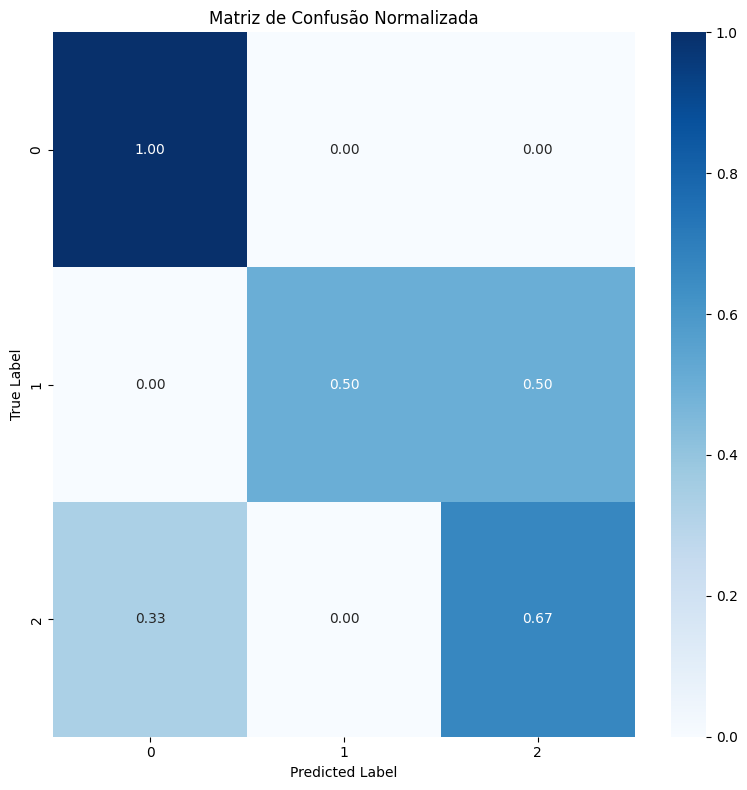


Calculando as métricas...

Sensibilidade: 0.70
Especificidade: 0.85
Acurácia: 0.70
Precisão: 0.70
F1-Score: 0.70

 Plotando o gráfico da Curva de ROC



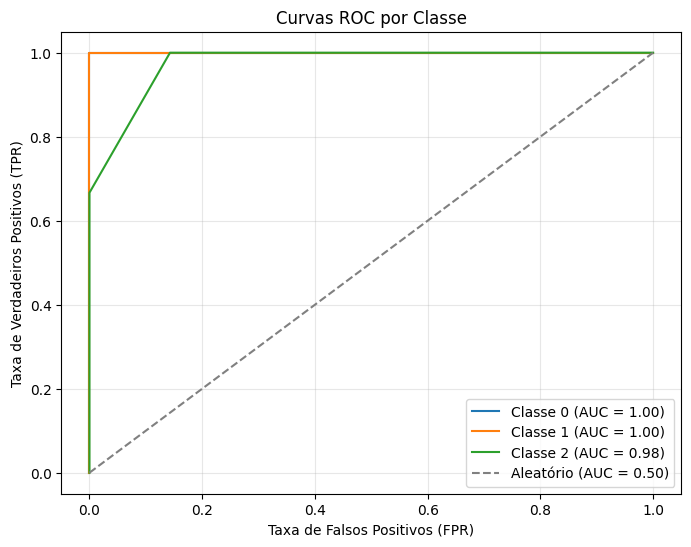

In [10]:

print("\nMatriz de Confusão")
con_mat = confusion_matrix(y_true_clf, y_pred_clf)
print(con_mat)
plot_conf_matrix(con_mat)
print("\nCalculando as métricas...\n")
calc_sensibility(con_mat)
calc_specificity(con_mat)
calc_accuracy(con_mat)
calc_precision(con_mat)
calc_fscore(con_mat)
print("\n Plotando o gráfico da Curva de ROC\n")
plot_roc_curve(y_true_clf, y_scores_clf, classes)